In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt   
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [54]:
##katsayılar önemli burda
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

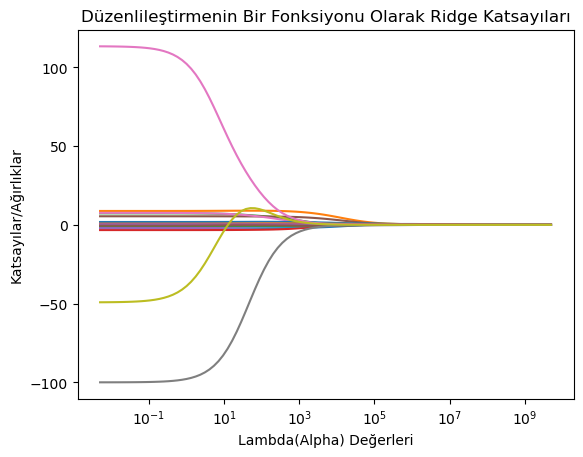

In [55]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
"""
np.linspace(10, -2, 100):Bu, NumPy'de kullanılan bir fonksiyondur. 10 ile -2 arasında eşit aralıklı 100 değer üretir.
np.linspace(10, -2, 100) ifadesi, 10 ile -2 arasında logaritmik bir ölçekte 100 değer üretir. 
"""
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
      
###Bu işlem sonucunda katsayilar listesi, her bir alpha değeri için Ridge regresyon modelinin katsayılarını içerir.
#Bu listeyi kullanarak, model katsayılarının düzenlileştirme parametresinin farklı değerlerine nasıl tepki verdiğini analiz edebilirsiniz.
#Özellikle, daha yüksek alpha değerlerinde katsayıların küçüldüğünü (hatta sıfıra yaklaştığını) gözlemleyebilirsiniz.  

import matplotlib.pyplot as plt   
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');
##Özellikle, daha yüksek alpha değerlerinde katsayıların küçüldüğünü (hatta sıfıra yaklaştığını) gözlemleyebilirsiniz.

In [56]:
## tahmin
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282842

In [57]:
### model tuning
lambdalar = 10**np.linspace(10, -2,100)*0.5

###Makine öğrenmesinde "normalize" işlemi, verilerin belirli bir aralığa ya da ölçeğe getirilmesi anlamına gelir.
#Bu, modelin daha iyi öğrenmesini ve daha hızlı konverjansa ulaşmasını sağlar. 
#Normalize işlemi, genellikle veri setindeki özelliklerin aynı ölçek ve aralıkta olmasını sağlar.
##from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() bu z scorea göre normalize eder
from sklearn.preprocessing import MinMaxScaler ## 0 ve 1 aralığında normalize der
scaler = MinMaxScaler()
X_normalized_train = scaler.fit_transform(X_train)

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring = "neg_mean_squared_error"  )

###modeli uygula
ridge_cv.fit(X_normalized_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [58]:
ridge_cv.alpha_

5.361336110051605

In [59]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_normalized_train,y_train) ## bu aslında ypred değeri şu an
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

1078153.6965867921

In [1]:
!cd

C:\Users\Zeynep\Documents


In [2]:
cd :\Users\Zeynep\Documents\zeynep-software

[WinError 123] Dosya adı, dizin adı veya birim etiketi sözdizimi hatalı: ':\\Users\\Zeynep\\Documents\\zeynep-software'
C:\Users\Zeynep\Documents


In [3]:
cd C:\Users\Zeynep\OneDrive\Belgeler\zeynep-software

C:\Users\Zeynep\OneDrive\Belgeler\zeynep-software


In [4]:
cd

C:\Users\Zeynep
